# **Shivam Krishna Mishra 20230802060 Lab 04**

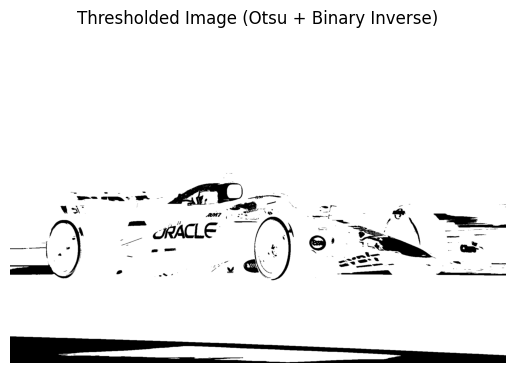

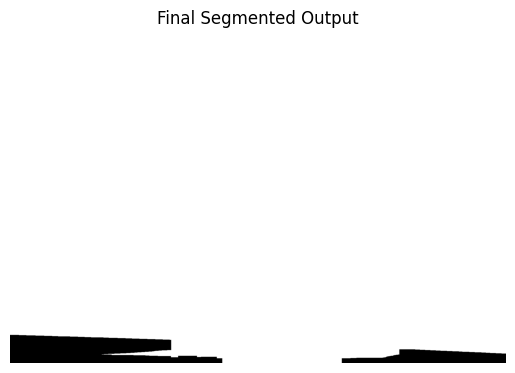

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab import files

# Read the image
img = cv2.imread('/content/sfv.jpg')
if img is None:
    print("Error: Image not loaded. Please check the file path.")

# Convert to grayscale and blur
if img is not None:
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)

# Thresholding (Otsu + Binary Inverse)
if img is not None:
    ret, thresh = cv2.threshold(
        gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
    )
    plt.imshow(thresh, cmap='gray')
    plt.title('Thresholded Image (Otsu + Binary Inverse)')
    plt.axis('off')
    plt.show()

# Morphological closing
kernel = np.ones((9, 9), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=3)

# Dilate to extract background
bg = cv2.dilate(closing, kernel, iterations=2)

# Find contours
contours, _ = cv2.findContours(
    closing, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE
)

result = np.zeros(gray.shape, dtype=np.uint8)

for contour in contours:
    if cv2.contourArea(contour) > 1000:
        cv2.fillPoly(result, [contour], 255)

# Opening to remove noise
kernel_open = np.ones((6, 6), np.uint8)
opened_result = cv2.morphologyEx(
    result, cv2.MORPH_OPEN, kernel_open, iterations=2
)

# Erode to clean edges
kernel_erode = np.ones((9, 9), np.uint8)
final_result = cv2.erode(opened_result, kernel_erode, iterations=2)

# Display final output
plt.imshow(final_result, cmap='gray')
plt.title('Final Segmented Output')
plt.axis('off')
plt.show()